# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful function of the Scikit-Learn libry

Contents:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm/model for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [9]:
# Standard inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## 0. An end-to-end Scikit-learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis = 1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

# convention is clf (classifier) =, or model = 
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_preds = clf.predict(X_test)
y_preds

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [10]:
# 4. Evaluate the model on the training data and testing data
clf.score(X_train, y_train)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [11]:
clf.score(X_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

NameError: name 'y_preds' is not defined

In [13]:
confusion_matrix(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [14]:
accuracy_score(y_test, y_preds)

NameError: name 'y_preds' is not defined

In [15]:
# 5. Improve a model
# Try different amount of n_estimators (one of hyperparemets a.k.a. dials on ML model)
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

trying model with 10 estimators...
Model accuracy on test set: 83.61%

trying model with 20 estimators...
Model accuracy on test set: 81.97%

trying model with 30 estimators...
Model accuracy on test set: 83.61%

trying model with 40 estimators...
Model accuracy on test set: 83.61%

trying model with 50 estimators...
Model accuracy on test set: 81.97%

trying model with 60 estimators...
Model accuracy on test set: 81.97%

trying model with 70 estimators...
Model accuracy on test set: 83.61%

trying model with 80 estimators...
Model accuracy on test set: 81.97%

trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [16]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # write binary

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # read binary
loaded_model.score(X_test, y_test)

0.7868852459016393

## 1. Getting data ready to be used with ML

Three main things to do:
1. Split the data into feature and labels (usually 'X' and 'y')
2. Filling (also called inputting) or disregarding missing value
3. Converting non-numerical values to numerical values (a.k.a. feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [20]:
# Splitting the data into the training and tests sets

from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [22]:
X.shape[0] * 0.8

242.4

### 1.1 Make sure it's all numerical

In [23]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #Doors can be considered as categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
# column transformer takes one-hot-encoder and apply it to categorical features and,for the remainder of the 
# columns that it finds, passes through (ignores them)

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X).head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [31]:
# alternative to one-hot-encoder: dummy variables
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [32]:
# Doors didn't convert to categorical, checking for myself:
car_sales2 = car_sales.copy()
car_sales2["Doors"] = car_sales2["Doors"].astype(str)

In [33]:
car_sales2.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors            object
Price             int64
dtype: object

In [34]:
dummies2 = pd.get_dummies(car_sales2[["Make","Colour","Doors"]])
dummies2.head()

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0


In [35]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.891612713353635, 0.3235867221569877)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [37]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Stuff that i was checking, most-likely to be ignored

In [39]:
# if i want to use .get_dummies i have to change doors to categorical first but .astype(str) changes even NaNs to strings hence:
car_sales_missing["Doors"] = car_sales_missing["Doors"].astype("category")

In [40]:
car_sales_missing_dummy = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])
car_sales_missing_dummy.isna().sum()
# concerning -> get_dummies changes missing data into category (actually that's Dan's solution later on so idk)

Make_BMW        0
Make_Honda      0
Make_Nissan     0
Make_Toyota     0
Colour_Black    0
Colour_Blue     0
Colour_Green    0
Colour_Red      0
Colour_White    0
Doors_3.0       0
Doors_4.0       0
Doors_5.0       0
dtype: int64

---

### Dealing with NaN erros
#### 1. Fill missing data with Pandas

In [41]:
car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)

In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

If the label is missing, the row probably might be just as well deleted

In [43]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [45]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #Doors can be considered as categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
# column transformer takes one-hot-encoder and apply it to categorical features and,for the remainder of the 
# columns that it finds, passes through (ignores them)

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

Worth to rembember that he removed NaNs because onehot couldn't work with NaNs in the past (no longer the case)

### 2. Fill missing values with Scikit-learn

In [46]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels
car_sales_missing.dropna(subset = ["Price"], inplace = True)

In [49]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [50]:
# Split into X and y
X = car_sales_missing.drop(axis = 1, labels =  "Price")
y = car_sales_missing["Price"]

# Split data into train and data test
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2)

In [51]:
X_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [52]:
X_train.head()

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0


In [53]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value = "missing") # if value is constant we have to pass fill_value that will be used to fill empty values
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4) # constant because the filling value remains the same for all defined columns
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features  = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features), # name of imputer, imputer to be used on the specified features
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
  

In [54]:
# Get transformed data array back into data frame format
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                     columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
# check missing data in training data set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
# Make categorical features into numerical
cat_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one hot",
                                  one_hot,
                                  cat_features)],
                                remainder = "passthrough")

# fill the train and test values seperately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [56]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses word 'estimator' as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-learn ML map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


## 2.1 Picking a machine learning model for a regression problem 

In [11]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [12]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
X = boston_df
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
y = pd.Series(boston["target"])
boston_df["target"] = y
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
# How many samples:
len(boston_df)

506

![](../Pictures/ml_map.png)

by looking at it right now we end up on "few features should be important" - we have 13 features and don't really know if that's a case for now, so let's ignore it: hence `RidgeRegression` or `SVR(kernel='linear')`

The image above is interactive on scikit learn page and takes to respective documentation pages for given estimator

In [15]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# set up random seed for reproducibility 
np.random.seed(42)

# Create the data 
display(X, y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [16]:
# Split into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the ridge model on test data
model.score(X_test, y_test)

0.9999999958220656

How do we improve this score?

What if Ridge wasn't working?

Refer back to map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [17]:
# Let's try random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into train and test sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Evaluate random forest regressor 
rf.score(X_test, y_test)

0.9997254225398743

In [18]:
model.score(X_test, y_test), rf.score(X_test, y_test)

(0.9999999958220656, 0.9997254225398743)

### 2.2 Choosing estimator for classification problem

... let's go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [19]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
len(heart_disease)

303

In [21]:
# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

Consulting the map and it says to try `LinearSVC`

In [22]:
# set up random seed
np.random.seed(42)

# divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Import LinearSVC estimator class 
from sklearn.svm import LinearSVC

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

C:\Users\ziolk\Desktop\ML_Projects\SampleProject\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.7933884297520661, 0.8688524590163934)

In [23]:
# warning due to fact that SVC is not scale invariant - highly suggested to normalise the data

# set up random seed
np.random.seed(42)

# divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# normalisation (min maxing)
heart_disease
from sklearn import preprocessing
x = X_train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled, columns = X_train.columns)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.270833,1.0,0.333333,0.265306,0.378753,0.0,0.5,0.649123,0.0,0.000000,1.0,0.00,0.666667
1,0.604167,1.0,0.000000,0.571429,0.321016,0.0,0.0,0.201754,1.0,0.142857,1.0,0.00,1.000000
2,0.354167,1.0,0.666667,0.571429,0.230947,0.0,0.5,0.517544,0.0,0.642857,0.5,0.00,0.666667
3,0.541667,0.0,0.333333,0.418367,0.274827,0.0,0.0,0.640351,0.0,0.250000,0.5,0.00,0.666667
4,0.645833,1.0,0.000000,0.234694,0.228637,1.0,0.5,0.631579,1.0,0.250000,1.0,0.50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.437500,1.0,0.666667,0.469388,0.235566,0.0,0.5,0.657895,0.0,0.107143,0.5,0.25,1.000000
238,0.458333,1.0,0.666667,0.000000,0.221709,0.0,0.5,0.578947,1.0,0.000000,1.0,0.25,1.000000
239,0.833333,1.0,1.000000,0.673469,0.237875,1.0,0.0,0.377193,0.0,0.017857,0.5,0.25,0.666667
240,0.354167,1.0,0.000000,0.265306,0.272517,0.0,0.0,0.491228,0.0,0.142857,1.0,0.00,1.000000


In [24]:
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.859504132231405, 0.47540983606557374)

In [25]:
# Standarisation 
from sklearn.preprocessing import StandardScaler

# set up random seed
np.random.seed(42)

# divide data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_scaled, columns = X_train.columns)
X_train_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
1,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
2,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
3,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
4,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-0.485856,0.722504,0.988089,0.574042,-0.262744,-0.383301,0.843133,0.577611,-0.676632,-0.375556,-0.694988,0.321860,1.178480
238,-0.376988,0.722504,0.988089,-2.165023,-0.376625,-0.383301,0.843133,0.174136,1.477907,-0.920864,0.953905,0.321860,1.178480
239,1.582631,0.722504,1.968079,1.764940,-0.243763,2.608918,-1.046109,-0.856969,-0.676632,-0.829979,-0.694988,0.321860,-0.509048
240,-0.921327,0.722504,-0.971891,-0.616856,0.040941,-0.383301,-1.046109,-0.274171,-0.676632,-0.193787,0.953905,-0.689701,1.178480


In [26]:
clf = LinearSVC()
clf.fit(X_train_scaled, y_train)
clf.score(X_train_scaled, y_train), clf.score(X_test, y_test)

(0.859504132231405, 0.5081967213114754)

Considering it's binary problem score of 0.5 is highly undesirable 

In [27]:
# import the randomforestclassifier 
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# evaluate
rf.score(X_test, y_test)

0.8524590163934426

Nicc

There's tidbit in ML community: 
 1. if you're working with structured data there are high chances that ensembles will perform well
 2. if you're working with unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Differnt names for:
* `X` = features, feature variables
* `y` = label, targets, target variables

In [28]:
# import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set random seed
np.random.seed(42)

# instantiate the model
clf = RandomForestClassifier()

# fit the model to the data (train the machine learning model)
clf.fit(X_train, y_train)


#evaluate the model (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8360655737704918

In [29]:
display(X.head(), y.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [30]:
# Use trained model to make predictions

# clf.predict(np.array([1,2,3,4,5])) # this won't work as the data has to have same shape (sort of)

clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [31]:
# Compare predictions to the truth labels to evaluate the model
y_preds = clf.predict(X_test) # good practice to assign predicted data to a variable 
np.mean(y_preds == y_test)

0.8360655737704918

In [32]:
sum(y_preds == y_test), len(X_test), 51/61, clf.score(X_test, y_test)

(51, 61, 0.8360655737704918, 0.8360655737704918)

In [33]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_preds)

0.8360655737704918

Make predictions with `predict_proba()`

In [34]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.65, 0.35],
       [0.62, 0.38],
       [0.12, 0.88],
       [0.6 , 0.4 ],
       [0.32, 0.68]])

In [35]:
# let's predict on the same data
clf.predict(X_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

Useful when you want to check if your model is confident with the outputs and allows to investigate why the model isn't sure about given samples.

`predict()` can also be used for regression models

In [36]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
# import RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# make data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# instantiate and fit model to data
model = RandomForestRegressor().fit(X_train, y_train) # code chaining

# make predictions
y_preds = model.predict(X_test) 

In [38]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [39]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [40]:
# compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds) # on average the single prediction is wrong by this value

2.136382352941176

## 4. Evaluating a machine learning model

Three ways of evaluating Sklearn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating a model with the `score` method
* Every estimator has some default `.score` method,  e.g. usually for classification or regression problem it returns mean accuracy or coefficient of determination $R^2$   respectively
* probably the first estimator method to be called after fitting the model
* however, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

In [41]:
from sklearn.ensemble import RandomForestClassifier

# set a seed for reproducibility
np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate and fit the model
clf = RandomForestClassifier().fit(X_train, y_train)


In [42]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8289473684210527)

Let's do the same but for regression

In [43]:
# import RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# make data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# instantiate and fit model to data
model = RandomForestRegressor().fit(X_train, y_train) # code chaining

In [44]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using `scoring` parameter 

In [45]:
from sklearn.model_selection import cross_val_score

# set a seed for reproducibility
np.random.seed(42)

# make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate and fit the model
clf = RandomForestClassifier().fit(X_train, y_train)

In [46]:
clf.score(X_test, y_test)
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

![](../Pictures/sklearn-cross-validation.png)

* Cross validation helps to ensure that the model performance is not pure luck
* Basically divides the data into `cv` folds and trains and tests the accuracy on them separately, the result is an array of scores for respective folds

In [47]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two
clf_single_score, clf_cross_val_score

(0.8289473684210527, 0.8248087431693989)

scoring parameter set to None by default

`cross_val_score(clf, X, y, scoring = None)`  i.e. uses default scoring parameter of the model so it's accuracy in case of clf

### 4.2.1 Classification model evaluation metrics 

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [49]:
np.mean(cross_val_score)

0.8248087431693989

In [50]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are comparison of model's true positive rate (tpr) versus false positive rate (fpr).

* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when the truth is 1

In [51]:
# Create X_test etc...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# fit the classifier (can't make predictions without fitting)
clf = RandomForestClassifier().fit(X_train, y_train)

In [52]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [53]:
y_probs_positive = y_probs[:, 1] # second column of y_probs
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [54]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

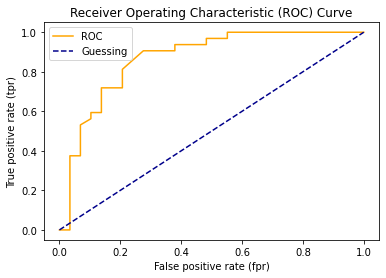

In [55]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given false positive rate (fpr) and 
    true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = '--', label = "Guessing")
    
    # Customise a plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive) # area under the yellow curve (perfect would be 1.0)

0.8669181034482759

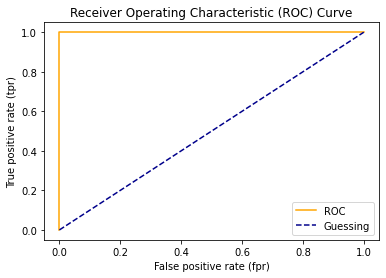

In [57]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [58]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

Is a quick way to compare the labels a models predicts and the actual labels it was supposed to predic.

In essence, giving you an idea where the model is getting confused

In [59]:
from sklearn.metrics import confusion_matrix
y_preds =clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [60]:
# Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual labels"],
            colnames=["Predicted labels"])
# 2 false negatives, 8 false positives

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


In [61]:
27+8+2+24, len(y_test) 

(61, 61)

In [62]:
# How to install a conda package into the current environment in Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn
# prefix is another name for pathname (conda's environment)

Solving environment: ...working... done

# All requested packages already installed.



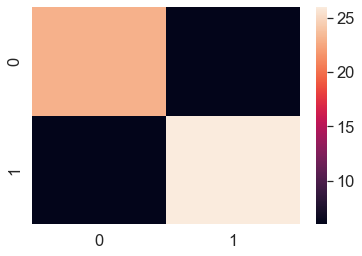

In [63]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
# Plot is using seaborn
sns.heatmap(conf_mat);

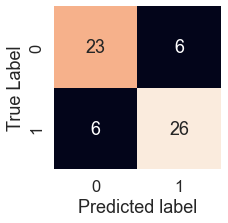

In [64]:
import seaborn as sns

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, #Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label");

plot_conf_mat(conf_mat)

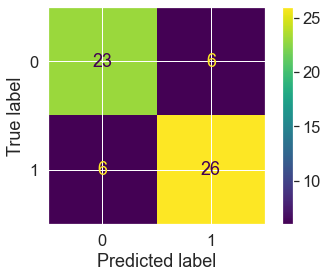

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);

**Classification Report**

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



**Classification report anatomy:**

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

In [67]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case 

disease_preds = np.zeros(10000) # model predicts every case to be 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\ziolk\Desktop\ML_Projects\SampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ziolk\Desktop\ML_Projects\SampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ziolk\Desktop\ML_Projects\SampleProject\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [68]:
# macro avg being 0.5 while accuracy and weighted avg close to 1

### 4.2.2 Regression Model Evaluation Metrics

Documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

1. $R^2$ (coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

$R^2$

What R^2 does: Compares your models predictions to the mean of the targets. Values can range from minus infinity (very poor model) to 1 (perfect model). For example, if all your model does is predict the mean of the targets, its R^2 value would be 0.

In [79]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test) # by default R^2

0.8654448653350507

In [85]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.ones(len(y_test))*np.mean(y_test)
#or
y_test_mean = np.full(len(y_test), y_test.mean())
r2_score(y_test, y_test_mean)


2.220446049250313e-16

In [86]:
r2_score(y_test, y_test)

1.0

R^2 value doesn't tell how prediction is far off from actual value, hence:

**Mean Absolute Error (MAE)**

In [89]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [98]:
df = pd.DataFrame(data ={"actual values": y_test, "predicted values": y_preds, "error": y_test-y_preds})

In [99]:
df

,actual values,predicted values,error
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [95]:
np.mean(abs(y_test-y_preds))

2.136382352941176

**Mean Squared Error (MSE)**

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [107]:
np.mean((y_test-y_preds)**2)

9.867437068627439

* **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Now you might be thinking, which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.

Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

### 4.2.3 Finally using the `scoring` parameter

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier() 

In [122]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [118]:
# Cross-validated accuracy
print(f"The Cross Validated accuracy is: {cv_acc.mean()*100:.2f}%")

The Cross Validated accuracy is: 82.48%


In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
print(f"The Cross Validated accuracy is: {cv_acc.mean()*100:.2f}%")

The Cross Validated accuracy is: 82.48%


In [129]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [135]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision.mean()

0.8329547346025924

In [136]:
# Recall
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_precision.mean()

0.8545454545454545

In [137]:
# F1
np.random.seed(42)
cv_f1 = cross_val_score(clf, X,y, scoring='f1')
cv_f1.mean()

0.8426854603423346

How about regression model?

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]
model = RandomForestRegressor()

In [155]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2.mean(), cv_r2.mean()

(0.6243870737930857, 0.6243870737930857)

In [154]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2.mean(), cv_r2

(0.6243870737930857,
 array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]))

In [151]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mse

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [152]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### 4.3 Using different evaluation metrics as Scikit-learn functions

**Classification evaluation functions**

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [168]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Model metrics on the test set:
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442
